# Image Classification using KNeighborsClassifier

Simple Image Classification using KNeighborsClassifier and Feature Extraction

### Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

### Initialization
Path of the main folder containing image dataset files

In [2]:
# Load the dataset
data = ''

List of target categories which are required for model training and predictions.

In [3]:
target = []

## Data Fetching

The OS module in Python provides functions for interacting with the operating system. This module provides a portable way of using operating system-dependent functionality. 

OpenCV-Python is a library of Python bindings designed to solve computer vision problems.

We will use the "**os.path**" module to interact with the file system and the "**cv2.imread()**" method to load an image from the specified file path.

In [4]:
# Loading the image dataset and plotting some images from all target categories
def plot_image(data, target):
  count = 0
  for category in target:
      path=os.path.join(data, category)
      flg = 0
      ar = []
      # storing image paths in an array
      for img in os.listdir(path):
          ar.append(os.path.join(path,img)) 
          flg+= 1
          if flg==2:
            break
      # plotting the images in dataset
      plt.figure(figsize=(5,5))
      for i in range(2):
        d1 = ar[i]
        img_array = cv2.imread(d1,cv2.IMREAD_COLOR)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        ax = plt.subplot(1,2,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis("off")
      count+= 1
      if count == len(target):
        break   

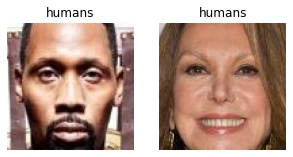

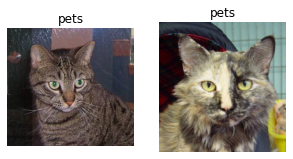

In [5]:
plot_image(data, target)

## Data Preprocessing
Since we are working with image data we need to preprocess our data because the machine learning model cannot work directly with images. So the images are converted into a format that our machine learning algorithm can understand. 

Image data is represented as a matrix, where the depth is the number of channels. An RGB image has three channels (red, green, and blue) and we create a function that firstly resizes all the images so that the model receives inputs of the same size and then stores them as an array of RGB values.

The different categories of images are also read and labeled (as 0,1,2....). We finally append the images and their labelled category into a single list that acts as our final preprocessed dataset.

In [6]:
def create_training_data(data,target):
    training_data=[]
    img_size = 50
    for category in target:
        path=os.path.join(data, category)
        class_num=target.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
    return training_data

Calling preprocessing function on our actual image data

In [7]:
training_data = create_training_data(data,target) 
df = pd.DataFrame(training_data, columns=['image', 'label'])
df.head()

,image,label
0,"[[[252, 252, 252], [252, 252, 252], [252, 252,...",0
1,"[[[202, 204, 208], [194, 201, 209], [139, 151,...",0
2,"[[[44, 64, 183], [43, 63, 181], [43, 63, 182],...",0
3,"[[[95, 70, 68], [94, 68, 66], [97, 69, 68], [9...",0
4,"[[[63, 66, 74], [59, 62, 71], [70, 70, 85], [8...",0


## Feature Selections

After preprocessing our data into a single array, we now need to provide the input and the target features for our model. 

Also the SVM training model accepts dimension <=2 so we need to convert the image data to 2D by converting our features into numpy arrays and then flattening our input feature X.

In [8]:
lenofimage = len(training_data)
X, y = [], []
for categories, label in training_data:
    X.append(categories)
    y.append(label)
# Flattening our training feature
X = np.array(X).reshape(lenofimage,-1)
y = np.array(y)

## Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

### Model
Used sklearn.neighbors.KNeighborsClassifier

Sklearn.neighbors provides functionality for unsupervised and supervised neighbors-based learning methods.
The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).


#### Model Tuning Parameters
> - n_neighbors -> Number of neighbors to use by default for kneighbors queries.

> - weights -> weight function used in prediction. Possible values: ‘uniform’, ‘distance’ or callable, default=’uniform’

> - algorithm -> Algorithm used to compute the nearest neighbors: ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’

> - leaf_size -> Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.

Read more at [scikit-learn.org](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [10]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

#### Model Accuracy


score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [11]:
y_pred = model.predict(X_test)
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 90.79 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

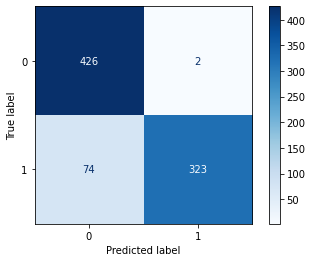

In [12]:
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [13]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       428
           1       0.99      0.81      0.89       397

    accuracy                           0.91       825
   macro avg       0.92      0.90      0.91       825
weighted avg       0.92      0.91      0.91       825



### Prediction Plot
First we select a random target from our dataset, after that we select a random image file from that target and store the complete path of this image in a variable.

After that we first plot the selected image and then with the help of our trained model, we try to predict the category of the selected image along with the confidence level.

In [14]:
def image_pred_plot(data,target):
    url = os.path.join(data,random.choice(target))
    test_img = ""
    for img in random.choice(os.listdir(url)):
          test_img = test_img+img

    img_array = cv2.imread(os.path.join(url,test_img))
    plt.imshow(img_array)
    plt.show()
    img_resize=cv2.resize(img_array,(50,50))
    l=[img_resize.flatten()]
    probability=model.predict_proba(l)
    for ind,val in enumerate(target):
      print(f'{val} = {probability[0][ind]*100}%')
    print("The predicted image is : "+target[model.predict(l)[0]])

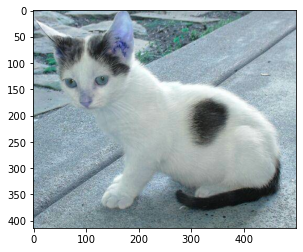

humans = 0.0%
pets = 100.0%
The predicted image is : pets


In [15]:
image_pred_plot(data,target)

#### Creator: Snehaan Bhawal , Github: [Profile](https://github.com/Sbhawal)
